# [Computational Social Science]
## 4-1 Clustering and PCA - Student Version

**Clustering** is an unsuperivsed ML method used to group data points based on their features alone, and no observed grouping labels as in supervised classification. Thus most clustering alorithms seeks to group points by their distance in a high dimensional space generated by provided features.

Below is a plot showing the results of the clustering algorithms in `Scikit-Learn` for several different toy datasets.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png'/>

## Virtual Environment
Remember to always activate your virtual environment first before you install packages or run a notebook! This helps to prevent conflicts between dependencies across different projects and ensures that you are using the correct versions of packages. You must have created anaconda virtual enviornment in the `Anaconda Installation` lab. If you have not or want to create a new virtual environment, follow the instruction in the `Anaconda Installation` lab. 

<br>

If you have already created a virtual enviornment, you can run the following command to activate it: 

<br>

`conda activate <virtual_env_name>`

<br>

For example, if your virtual environment was named as CSS, run the following command. 

<br>

`conda activate CSS`

<br>

To deactivate your virtual environment after you are done working with the lab, run the following command. 

<br>

`conda deactivate`

<br>

### 1) K-means clustering  

In this section we will cover k-means clustering using `scikit-learn`. The scikit-learn documentation for clustering is found [here](http://scikit-learn.org/stable/modules/clustering.html).

First we'll import `KMeans` and `numpy` so that we can make our arrays. The `%matplotlib inline` will make our plots show up within the notebook.

In [5]:
# load libraries 
# ----------
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# settings
%matplotlib inline

We'll start off with a few points arranged in an array.

In [7]:
# create an array of points
X = np.array([[0,1], [1,2], [1, 0], [-1, -3],
             [15, 21], [18, 30], [20, 20], [22, 19],
             [45, 50], [42, 48], [60, 40], [50, 50]])
X

array([[ 0,  1],
       [ 1,  2],
       [ 1,  0],
       [-1, -3],
       [15, 21],
       [18, 30],
       [20, 20],
       [22, 19],
       [45, 50],
       [42, 48],
       [60, 40],
       [50, 50]])

If we plot them we can see that they appear to be arranged roughly in three groups. *Note: the asterisk is used for "unpacking" the two lists in `X.T` into the function call of `plt.scatter`*.

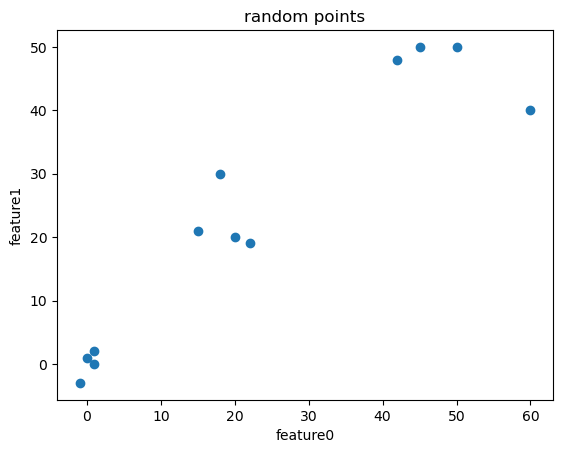

In [9]:
# visualize
plt.scatter(*X.T)
plt.title('random points')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

To get our clusters, all we have to do is specify how many we want, and then fit the model to the data. We'll choose 3. We can also specify the maximum number of iterations of the k-means algorithm, which you may want to do with a much larger dataset.

First thing's first: **set a random seed!**

In [11]:
# set random seed
np.random.seed(10)

Now we can create the model. We'll use the [`KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) methods from sklearn.

In [13]:
# specify kmeans algorithm 
# ----------
kmeans = KMeans(n_clusters=3,
                n_init=10,
                max_iter=300 #default
                ).fit(X)

We can access the centers of the clusters through the `cluster_centers_` attribute. To get the labels (i.e. the corresponding cluster) we use `labels_`.

In [15]:




# print the centers 
print("Centers")
print(kmeans.cluster_centers_)
print()

# print labels
print("Labels")
print(kmeans.labels_)
print()

# print coordinates and labels 
for point, label in zip(X, kmeans.labels_):
    print("Coordinates:", point, "Label:", label)

Centers
[[49.25 47.  ]
 [ 0.25  0.  ]
 [18.75 22.5 ]]

Labels
[1 1 1 1 2 2 2 2 0 0 0 0]

Coordinates: [0 1] Label: 1
Coordinates: [1 2] Label: 1
Coordinates: [1 0] Label: 1
Coordinates: [-1 -3] Label: 1
Coordinates: [15 21] Label: 2
Coordinates: [18 30] Label: 2
Coordinates: [20 20] Label: 2
Coordinates: [22 19] Label: 2
Coordinates: [45 50] Label: 0
Coordinates: [42 48] Label: 0
Coordinates: [60 40] Label: 0
Coordinates: [50 50] Label: 0


Now let's also plot out cluster centers along with the points.

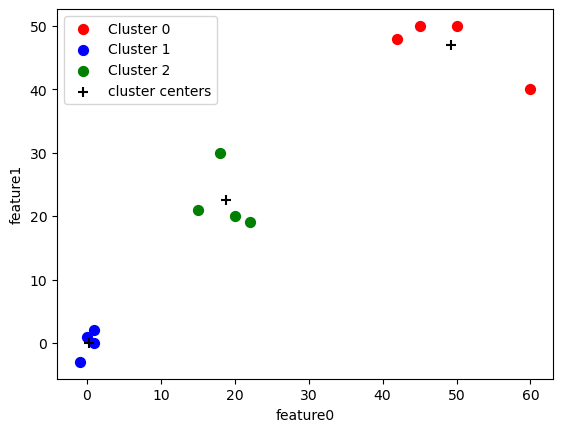

In [17]:
# plot the centers along with the points by cluster
# ----------

# figure settings
fig = plt.figure()
ax1 = fig.add_subplot(111)

# plot
ax1.scatter(*X[kmeans.labels_==0,:].T, s=50, c='r', label='Cluster 0')
ax1.scatter(*X[kmeans.labels_==1,:].T, s=50, c='b', label='Cluster 1')
ax1.scatter(*X[kmeans.labels_==2,:].T, s=50, c='g', label='Cluster 2')
ax1.scatter(*kmeans.cluster_centers_.T, s=50, marker='+', c='black', label='cluster centers')
plt.legend(loc='upper left')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

If we want to see to which cluster a new point would belong, we simply use the `predict` method.

Predictions:

0, 4
Cluster: [1]

19, 25
Cluster: [2]

40, 50
Cluster: [0]


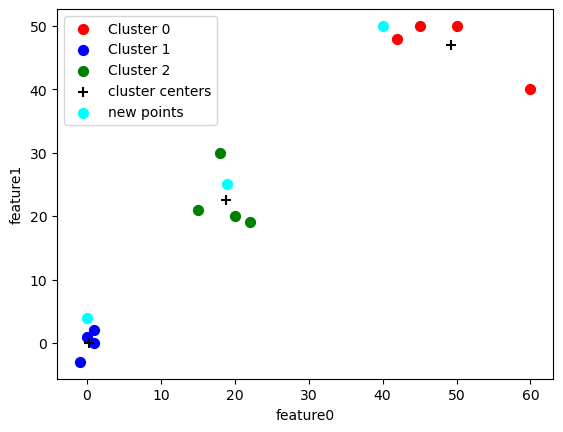

In [19]:
# predict to see which cluster a new point would belong
# ----------

# create new points
new_points = np.asarray([[0, 4],
                        [19, 25],
                        [40, 50]])

# print predictions
print("Predictions:")
print()

print("0, 4")
print("Cluster:", kmeans.predict([[0, 4]]))
print()

print("19, 25")
print("Cluster:", kmeans.predict([[19, 25]]))
print()

print("40, 50")
print("Cluster:", kmeans.predict([[40, 50]]))

# figure settings
fig = plt.figure()
ax1 = fig.add_subplot(111)

# plot new points
ax1.scatter(*X[kmeans.labels_==0,:].T, s=50, c='r', label='Cluster 0')
ax1.scatter(*X[kmeans.labels_==1,:].T, s=50, c='b', label='Cluster 1')
ax1.scatter(*X[kmeans.labels_==2,:].T, s=50, c='g', label='Cluster 2')
ax1.scatter(*kmeans.cluster_centers_.T, s=50, c='black', marker='+', label='cluster centers')
ax1.scatter(*new_points.T, s=50, c='cyan', label='new points')
plt.legend(loc='upper left')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

### 2) Agglomerative clustering

Now we'll show an example of agglomerative clustering, which is a type of hierarchical clustering. The documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) in case you want to know more about the parameters. We'll use some of scikitlearn's toy datasets.

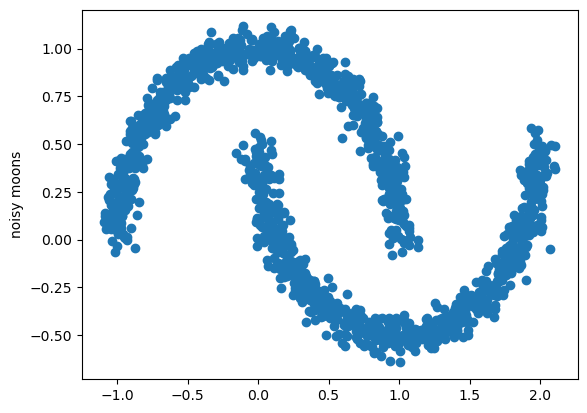

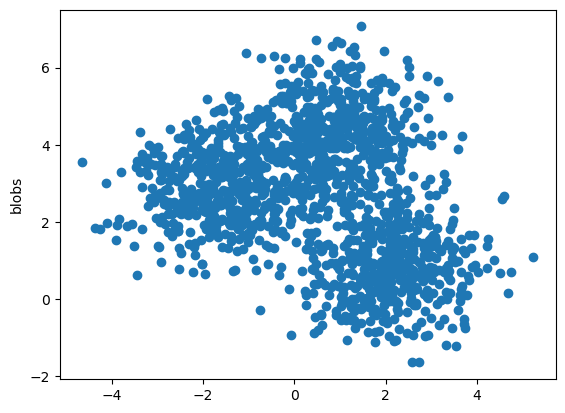

In [22]:
# load library
# ----------
from sklearn import datasets

# set samples 
n_samples = 1500

# create synthetic datasets: moons and blob dataset
# ----------

# moons
noisy_moons = datasets.make_moons(n_samples=n_samples, 
                                  noise=.05)[0]

# blobs
blobs, blob_truth = datasets.make_blobs(n_samples=n_samples, 
                                        random_state=0)

# plot each dataset
plt.scatter(*noisy_moons.T)
plt.ylabel('noisy moons')
plt.show()

plt.scatter(*blobs.T)
plt.ylabel('blobs')
plt.show()

We'll use two clusters this time, and use ward linkage.

In [26]:
# load library
# ----------
from sklearn.cluster import AgglomerativeClustering

# run algorithm
# ----------
ward = AgglomerativeClustering(n_clusters=3,
                               linkage='ward', #linkage can be ward (default), complete, or average
                               metric='euclidean') #affinity must be euclidean if linkage=metric

Now we'll fit the clustering model on the dataset.

In [28]:
# fit to data to moons
# ----------
ward.fit(noisy_moons)

AgglomerativeClustering(n_clusters=3)

Here we'll sort the points by label and then plot them.

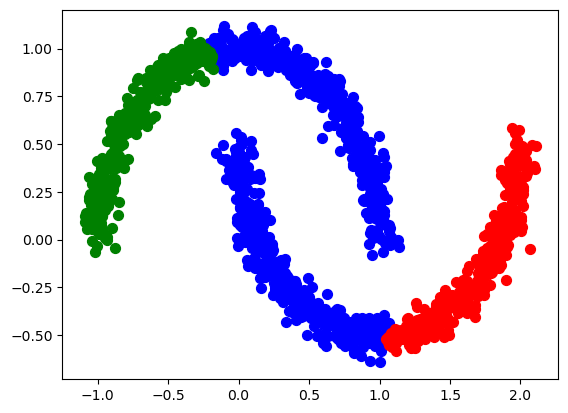

In [32]:
# plot 
# ----------

# sort by labels
zero = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 0])
one = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 1])
two = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 2])

# plot 
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
ax1.scatter(*two.T, s=50, c='g', label ='two')
plt.show()

Now we'll do the same with the blobs dataset.

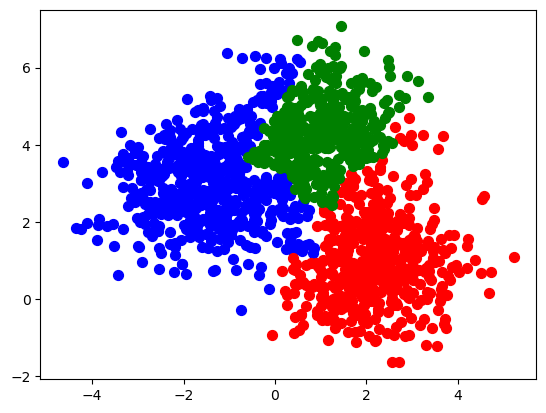

In [38]:
# fit to blob data 
# ----------
ward.fit(blobs)


# plot 
# ----------

# sort by labels
zero = np.array([point for label, point in zip(ward.labels_, blobs) if label == 0])
one = np.array([point for label, point in zip(ward.labels_, blobs) if label == 1])
two = np.array([point for label, point in zip(ward.labels_, blobs) if label == 2])

# plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
ax1.scatter(*two.T, s=50, c='g', label='two')
plt.show()

### Challenge: DBSCAN 


**It looks like our agglomerative clustering model did not cluster the noisy moons dataset how we might have wanted.** 

For the challenge, use [`DBSCAN`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to cluster noisy moons. Then plot the results and see what it looks like. Try an `eps` value of .2. This sets the maximum distance between two samples for them to be considered in the same neighborhood.

#### Moon data
 
Let's see if we can better capture the clear pattern in the data using `DBSCAN`. 

In [45]:
# load library
# ----------
from sklearn.cluster import DBSCAN

# define model object
# ----------
dbscan = ...

# fit model to data 
# ----------
...;

In [47]:
# get fitted labels for each data point 
labels = ...
labels

Ellipsis

In [49]:
# identify number of labels and their unique score
print(len(set(labels)))
print(np.unique(labels))

TypeError: 'ellipsis' object is not iterable

Check if there any outliers not included in either cluster. They will have a value of `-1`. Additionally, the count will be not match what we found above if there are outliers. 

In [ ]:
# get inferred clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  # outliers will have different values
n_clusters_

Let's plot the results to see if it better captures the patterns we see.

In [ ]:
# split data into those for each cluster 
# ----------
zero = np.array([point for label, point in zip(..., noisy_moons) if label == 0])
one = np.array([point for label, point in zip(..., noisy_moons) if label == 1])

# plot 
# ----------

# figure settings
fig = plt.figure()
ax1 = fig.add_subplot(111)

# plot the data with cluster assignment as the color 
ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
plt.legend(loc='upper left')
plt.show()

##### Blob data

Now let's fit another DBSCAN model to the blobs data and see what patterns it identifies.

In [ ]:
# define model object
# ----------
dbscan = ...

# fit model to data 
# ----------
dbscan...

In [ ]:
# get fitted labels for each data point 
labels = ...
labels

Again, see if there are outliers not included in any cluster

In [ ]:
# get inferred clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

And let's plot the points in the blobs dataset, coloring them by their cluster id.

In [ ]:
# plot 
# ----------
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(blobs[:, ... ],blobs[:, ...], s=50, c=labels, label='zero')

plt.legend(loc='upper left')
plt.show()

## Principal Component Analysis

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is an unsupervised machine learning technique. At a basic level, it summarizes information in many features by collapsing them into fewer features. PCA can be used for both exploratory data analysis and dimensionality reduction. For this exercise, we are going to use the [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) from sklearn. First, let's load in the data:

In [53]:
# load libraries
# ----------
from sklearn.datasets import load_breast_cancer

# process data
# ----------
breast = load_breast_cancer()

# create an array of features 
breast_data = breast.data

# create array of target data
breast_labels = breast.target

# reshape target array
labels = np.reshape(breast_labels,(569,1))

# concatenate features and labels
final_breast_data = np.concatenate([breast_data,labels],axis=1)

# get feature names
features = breast.feature_names
features_labels = np.append(features,'label')

# coerce to dataframe and add column names
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.columns = features_labels

In [55]:
# check out first 5 rows
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Let's take a look at the "label" column that will be our target:

In [58]:
# view label column
breast_dataset['label'].unique()

array([0., 1.])

Let's recode 0 to "benign" and 1 to "malignant" to make these more clear:

In [61]:
# recode labels
breast_dataset['label'].replace(0, 'Benign', inplace = True)
breast_dataset['label'].replace(1, 'Malignant', inplace = True)

/var/folders/f5/cxwzf1714jl8np8by14r5y8m0000gn/T/ipykernel_64796/1776654411.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign', inplace = True)


As with supervised methods, scaling our data in advance is usually a good idea. Apply the sklearn [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the features in our dataframe and save the result as an array called "X":

In [64]:
# load library 
# ----------
from sklearn.preprocessing import StandardScaler

# scale data
# ----------
X = breast_dataset.loc[:, features].values
X = StandardScaler().fit_transform(X) 

Now let's apply our PCA! Use the [`PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) method from sklearn to perform a PCA on the breast cancer features and summarize them with two components.

In [67]:
# load library 
# ----------
from sklearn.decomposition import PCA

# apply PCA
# ----------
pca = PCA(n_components=2)
principalComponents_breast = pca.fit_transform(X)

In [69]:
# convert into a dataframe
# ----------
pca_df = pd.DataFrame(data = principalComponents_breast, 
                      columns = ['principal component 1', 
                                 'principal component 2'])

In [71]:
# view factor loadings as dataframe
pca_df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


<Figure size 640x480 with 0 Axes>

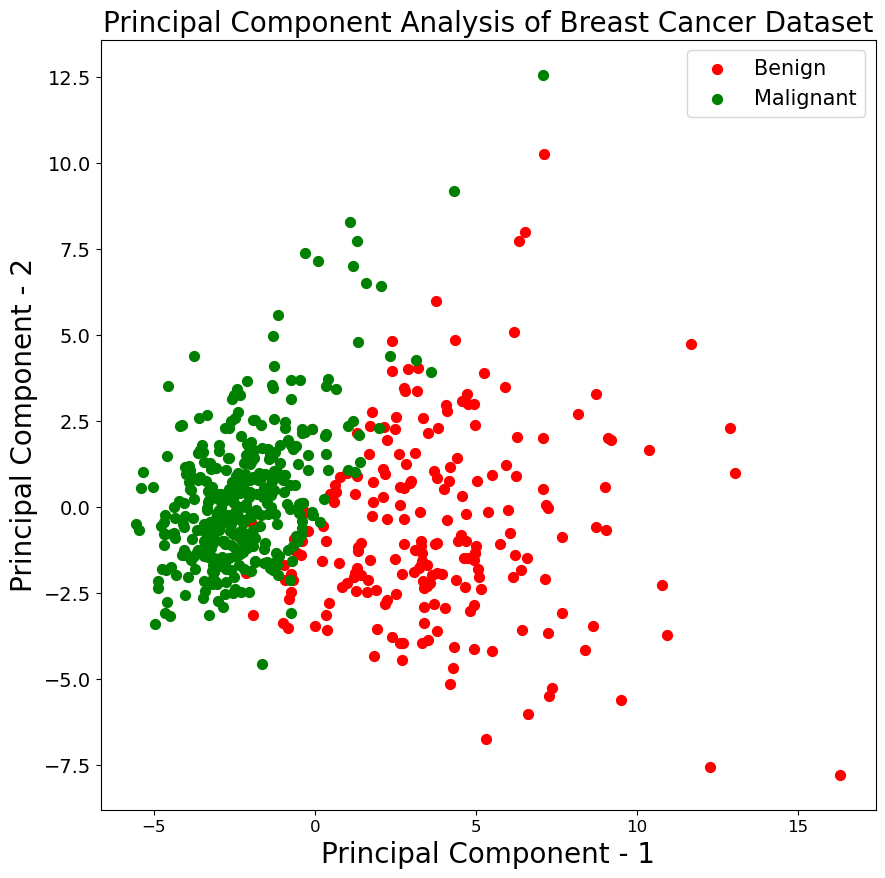

In [73]:
# plot
# ----------

# figure settings
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

# loop over targets and colors to create scatterplot
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

# show figure
plt.legend(targets,prop={'size': 15})
plt.show()

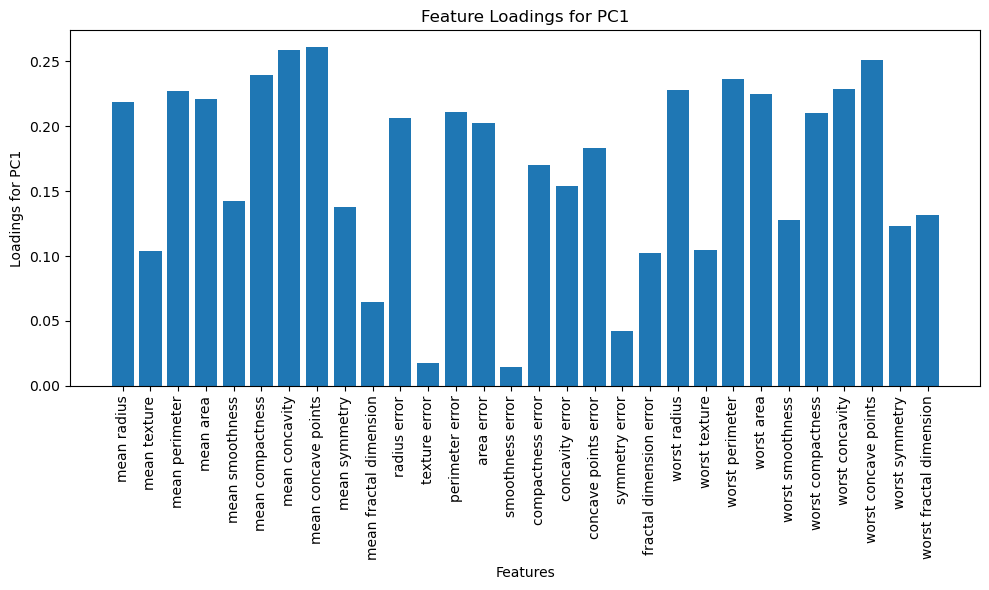

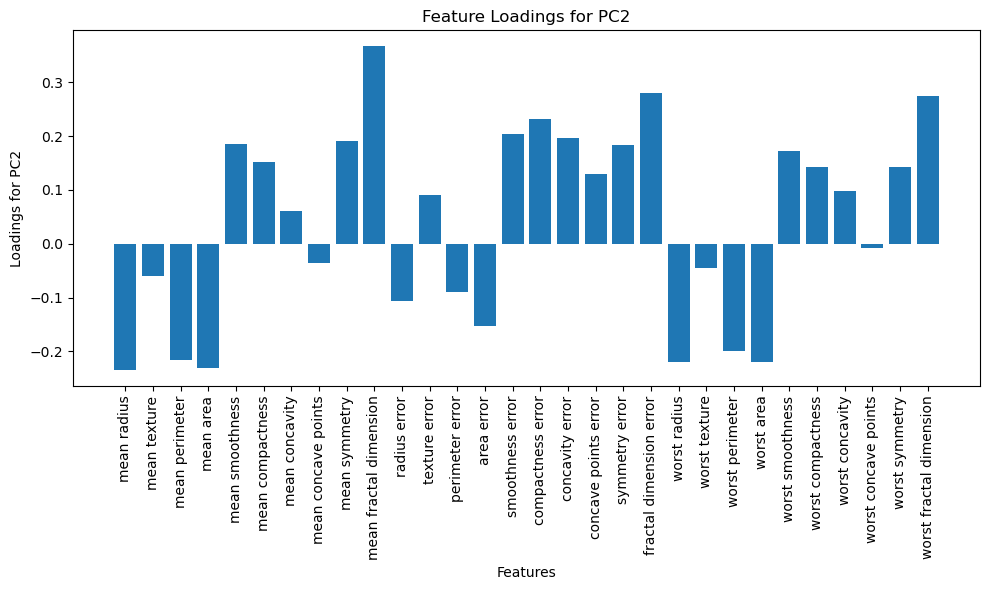

In [77]:
loadings = pca.components_.T

plt.figure(figsize=(10, 6))
plt.bar(features, loadings[:, 0])  # Loadings for PC1
plt.xlabel('Features')
plt.ylabel('Loadings for PC1')
plt.xticks(rotation=90)
plt.title('Feature Loadings for PC1')
plt.tight_layout()
plt.show()

# Optional: Plot loadings for the second principal component
plt.figure(figsize=(10, 6))
plt.bar(features, loadings[:, 1])  # Loadings for PC2
plt.xlabel('Features')
plt.ylabel('Loadings for PC2')
plt.xticks(rotation=90)
plt.title('Feature Loadings for PC2')
plt.tight_layout()
plt.show()

#### Using a scree plot to help determine the number of components to keep

To keep things simple in this lab, we limit the number of components above to 2. But if you wanted to know how many components to include, you might use a scree plot. Instead of specifying `n=2` above, you will not specify anything ,which will keep all components. You can then use the following code to create a scree plot using the `explained_variance_ratio_` attribute from the returned PCA object.

**QUESTION:** How many components might you keep just based on the scree plot?

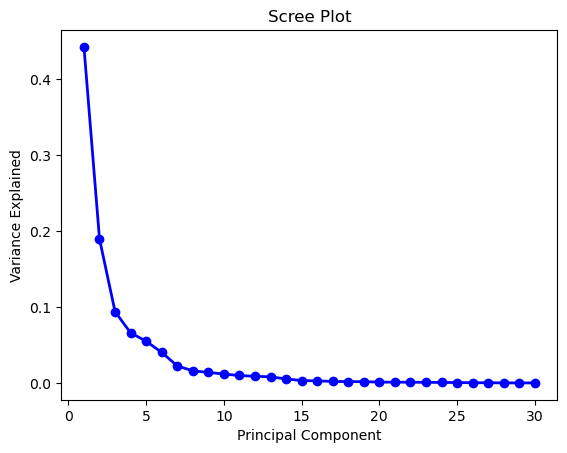

In [88]:
#
# Create a scree plot to evaluate the number of components to keep
# --------------------------------------------------

# fit PCA
# ----------
pca_all = PCA() # notice we do not specify the number of components if we want to keep them all
principalComponents_breast = pca_all.fit_transform(X)


# create scree plot from PCA fit
# ----------
PC_values = np.arange(pca_all.n_components_) + 1
plt.plot(PC_values, pca_all.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

**ANSWER:** ...

### Supervised Learning

Now, let's compare models using just the two components from the PCA with one that does not use any components to see how PCA might be helpful. 

First, train a logistic regression that predicts the label using all of the features. Then train a second logistic regression model that uses only the principal components as features. Let's see how they compare using confusion matrices.

In [93]:
# load libraries
# ----------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#### All features

First, use all the features to fit a logisitic model. Fill in the code below to fit a model that uses all the features. 

In [ ]:
#
# using all features
# --------------------------------------------------------

# create target dataset
# ----------
y = breast_dataset...

# create features dataset - give it a different name so we can reuse it in the second step for PCA
# ----------
X_original = breast_dataset...

# split data
# ----------
X_train, X_test, y_train, y_test = train_test_split(...,              # specify features dataset - use "original" here
                                                    ...,              # specify labels dataset
                                                    train_size = ..., # specify training dataset size
                                                    test_size=...,    # specify testing dataset size
                                                    random_state=10)  # set random seed


# initalize a logistic regresssion model
# ----------
logit_reg = LogisticRegression(max_iter= 5000) 


# fit the model to the training data
# ----------
logit_model = logit_reg.fit(..., 
                            ...)

# predict on the test set
# ----------
y_pred = logit_model.predict(...)


# create a confusion matrix
# ----------
cf_matrix = confusion_matrix(..., 
                             ..., 
                             ...)      # make sure to normalize


# create a pandas dataset from the confusion matrix
# ----------
df_cm = pd.DataFrame(cf_matrix, 
                     range(2),
                     range(2))


# plot the confusion matrix
# ----------
df_cm = df_cm.rename(index=str, columns={0: "Benign", 1: "Malignant"})
df_cm.index = ["Benign", "Malignant"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### PCA components

Now, see what a model looks like just using the two components from the PCA. Fill in the code below and compare to results from the model that uses all the features above.

In [ ]:
#
# using PCA Features
# --------------------------------------------------------


# create target dataset
# ----------
y = breast_dataset...


# create features dataset 
# ----------
X = pca_df



# split data
# ----------
X_train, X_test, y_train, y_test = train_test_split(..., 
                                                    ...,
                                                    train_size = ...., 
                                                    test_size=.... 
                                                    random_state=10)


# initalize a logistic regresssion model
# ----------
logit_reg = LogisticRegression(max_iter= 5000) 



# fit the model
# ----------
logit_model = logit_reg.fit(..., 
                            ...)


# predict on test set
# ----------
y_pred = logit_model.predict(...)


# create a confusion matrix
# ----------
cf_matrix = confusion_matrix(..., 
                             ..., 
                             ...)              # make sure to normalize

# create a pandas dataframe from the confusion matrix
# ----------
df_cm = pd.DataFrame(cf_matrix, 
                     range(2),
                     range(2))


# plot the confusion matrix
# ----------
df_cm = df_cm.rename(index=str, 
                     columns={0: "Benign", 1: "Malignant"})
df_cm.index = ["Benign", "Malignant"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# specify labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**QUESTION**: How did the logistic regression trained on just the PCA features compare to the original?

**ANSWER**: ...

---
Authored by Aniket Kesari. Materials borrowed from D-Lab's [Python Machine Learning Workshop](https://github.com/dlab-berkeley/python-machine-learning/blob/master/3_clustering.ipynb), and [datacamp](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python). Slight additions by Kasey Zapatka in 2023.